In [1]:
# coding:utf-8

import pandas as pd
import numpy as np
import os,sys
import matplotlib.pyplot as plt

In [2]:
trade = pd.read_csv('../datas/t_trade.csv')
trade.head()

,rowkey,time,id,is_risk
0,3,2015-01-01 00:00:41.0,27863,0
1,6,2015-01-01 00:00:46.0,115201,0
2,13,2015-01-01 00:01:02.0,143711,0
3,32,2015-01-01 00:03:00.0,172699,0
4,43,2015-01-01 00:03:52.0,53265,0


In [28]:
tid = trade[trade['is_risk']==1]['id'].unique().tolist()
tid0 = trade[trade['is_risk']==0]['id'].unique().tolist()

In [30]:
ts = [ti for ti in tid if ti in tid0]
print len(ts),len(tid),len(tid0)

455 1086 25413


In [8]:
login = pd.read_csv('../datas/t_login.csv')
login.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01


In [23]:
ad = login[['log_from','ip']].groupby('log_from')['ip'].count()
ad

log_from
1     366410
2     196519
3         40
5          6
8        984
10     21466
11      6601
12         2
16       781
18       499
21      2337
Name: ip, dtype: int64

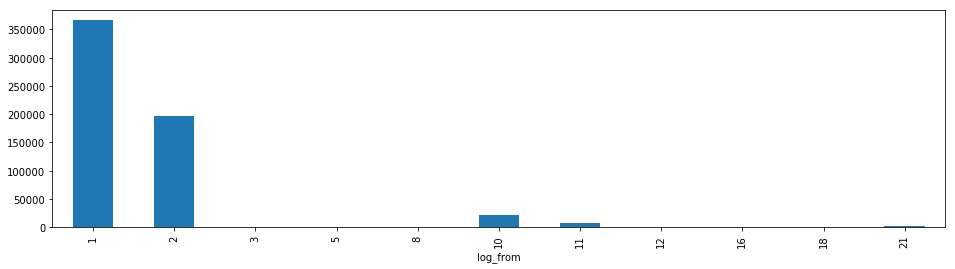

In [25]:
ad.plot.bar(figsize=(16,4))
plt.show()

In [3]:
trade4 = trade[trade['time']>='2015-04-01 00:00:00.0']
trade4.shape

(64353, 4)

In [4]:
trade4['hour'] = trade4['time'].map(lambda x:x[11:13])
trade4.head()

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rowkey,time,id,is_risk,hour
34142,470757,2015-04-01 00:03:08.0,125402,0,00
34143,470782,2015-04-01 00:11:57.0,61792,0,00
34144,470785,2015-04-01 00:13:34.0,61792,0,00
34145,470787,2015-04-01 00:14:06.0,78872,0,00
34146,470819,2015-04-01 00:31:24.0,49717,0,00


In [5]:
trade41 = trade4[trade4['is_risk']==1]
trade41.head()

,rowkey,time,id,is_risk,hour
34154,470938,2015-04-01 03:34:46.0,29438,1,03
34155,470942,2015-04-01 04:00:44.0,29438,1,04
34156,470943,2015-04-01 04:01:00.0,29438,1,04
34264,472221,2015-04-01 11:57:07.0,165662,1,11
34441,474942,2015-04-01 23:52:30.0,115988,1,23


In [32]:
tcnt = trade40[['id','is_risk']].groupby('id')['is_risk'].count()
tcnt.head(5)

id
5     1
6     6
23    1
25    2
28    1
Name: is_risk, dtype: int64

In [7]:
trade40 = trade4[trade4['is_risk']==0]
trade40.head(50)

,rowkey,time,id,is_risk,hour
34142,470757,2015-04-01 00:03:08.0,125402,0,00
34143,470782,2015-04-01 00:11:57.0,61792,0,00
34144,470785,2015-04-01 00:13:34.0,61792,0,00
34145,470787,2015-04-01 00:14:06.0,78872,0,00
34146,470819,2015-04-01 00:31:24.0,49717,0,00
34147,470827,2015-04-01 00:36:31.0,33238,0,00
34148,470831,2015-04-01 00:37:11.0,81888,0,00
34149,470843,2015-04-01 00:41:15.0,165237,0,00
34150,470851,2015-04-01 00:50:45.0,41293,0,00
34151,470865,2015-04-01 01:08:14.0,81999,0,01


In [13]:
d = login[((login['id']==29438)&(login['time']<'2015-04-01 03:34:46.0'))]
d = d.sort_values('time',ascending=False)
d

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
460592,1.266428e+15,11000.0,502268,2,383525,447,1,1.427330e+09,3,29438,False,False,2015-03-26 08:32:21
338177,8.581412e+15,5000.0,265699,2,1506306,58,1,1.425792e+09,3,29438,False,False,2015-03-08 13:20:18
139060,7.004618e+15,3000.0,835072,2,1276007,58,1,1.425667e+09,3,29438,False,False,2015-03-07 02:30:13
398375,1.225580e+16,5000.0,431146,2,397979,447,1,1.425014e+09,3,29438,False,False,2015-02-27 13:14:14
398376,5.362979e+15,5000.0,431146,2,397979,447,6,1.425014e+09,3,29438,False,False,2015-02-27 13:13:14
398374,9.846404e+15,6000.0,431146,2,397979,447,6,1.425014e+09,3,29438,False,False,2015-02-27 13:13:00


In [19]:
trade[((trade['id']==123315)&(trade['is_risk']==0))]

,rowkey,time,id,is_risk


In [17]:
trade[((trade['id']==123315)&(trade['is_risk']==1))]

,rowkey,time,id,is_risk
34952,482620,2015-04-04 03:21:36.0,123315,1
34953,482621,2015-04-04 03:22:38.0,123315,1
34954,482623,2015-04-04 03:23:16.0,123315,1
34955,482624,2015-04-04 03:23:29.0,123315,1
34956,482625,2015-04-04 03:23:42.0,123315,1
34957,482626,2015-04-04 03:24:48.0,123315,1
101602,482622,2015-04-04 03:23:02.0,123315,1


In [18]:
d = login[((login['id']==123315)&(login['time']<'2015-04-04 03:22:38.0'))]
d = d.sort_values('time',ascending=False)
d

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time
447714,1.390357e+15,4523.0,82055,1,997377,488,1,1.428089e+09,3,123315,False,False,2015-04-04 03:20:31
139069,2.588951e+15,3000.0,835072,2,455099,63,1,1.427894e+09,3,123315,False,False,2015-04-01 21:17:50
416581,3.566711e+16,4000.0,835072,2,1088922,58,1,1.427866e+09,3,123315,False,False,2015-04-01 13:26:51


In [6]:
trade41.head(50)

,rowkey,time,id,is_risk,hour
34154,470938,2015-04-01 03:34:46.0,29438,1,03
34155,470942,2015-04-01 04:00:44.0,29438,1,04
34156,470943,2015-04-01 04:01:00.0,29438,1,04
34264,472221,2015-04-01 11:57:07.0,165662,1,11
34441,474942,2015-04-01 23:52:30.0,115988,1,23
34454,475087,2015-04-02 01:33:56.0,106079,1,01
34455,475090,2015-04-02 01:34:59.0,90542,1,01
34545,476492,2015-04-02 13:32:40.0,17756,1,13
34548,476548,2015-04-02 13:48:40.0,174874,1,13
34549,476553,2015-04-02 13:49:55.0,174874,1,13
